# Geometry optimization of $H_2O$

Until now we have used fixed positions of the nuclei. This means we created a molecule with specified x,y,z coordinates for each atom, passed it to `psi4` and then we called `psi4.energy(method/basisset)`. By running such a single point energy calculation we find the lowest energy solution for the Schroedinger equation at the current geometry. 

Now, what if we do not know how our molecule looks like? E.g suppose the equilibrium bond length and the angle between the atoms of a triatomic molecule that you are looking at is unknown. How to find it? 

The procedue to start from a starting geometry and arrive at an optimal geometry is called **geometry optimization**. 

Consider the simple case of the hydrogen molecule, where the only
parameter that can be optimised is the distance between the nuclei. The
energy of every possible configuration is given by a two-dimensional
*potential energy surface* (PES): Starting from an initial guess for the
geometry, one may follow the curvature of the PES down to the minimal
energy, which will correspond to the equilibrium geometry. In a
practical geometry optimisation, this will be done in discrete steps of
a certain size. At each iteration, the energy of the corresponding geometry is calculated in a SCF calculation.


Then, the gradient with respect to the nuclear
coordinates is determined, and the nuclei are moved to a new position on
the PES that lies in the direction of the steepest gradient. The
geometry optimisation converges once the minimum is attained. In
practice, this implies that the forces on the nuclei fall below a
certain treshold.\

Larger systems will have more nuclear degrees of freedom than simple
bimolecular species, and in these cases the PES becomes
many-dimensional; each degree of freedom will correspond to one
dimension. Geometry optimisations may not converge on very complex
potential energy surfaces. If the program is fed with an input that
resides in a region of the PES that has a difficult topology, the
algorithm may not find a minimum, and it may be better to restart from a
different initial geometry. Furthermore, a PES may exhibit multiple
minima, and the geometry optimisation algorithm may only reach the next
local minimum, but not neccessarily the global minimum.



```{figure} ../../images/GeoOpt.png
---
name: geoopt
---
Procedure of a geometry optimization.
```


First again we again import the required modules:

In [22]:
import psi4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import sys 

sys.path.append("..")
from helpers import *

then we set the maximum ressources that can be used

In [23]:
psi4.set_memory('2 GB')
psi4.set_num_threads(4)

You will carry out a geometry optimisation on a bad guess for H$_2$O
with an unrealistic H-O-H angle of 90$^\circ$ and a O-H distance of 1.5Å. During the optimisation,
Psi4 will move the positions of the atoms in the molecule, moving downhill on the potential energy surface, until it finds a minimum. 


First, we define our suboptimal geometry. Again, we use a UHF reference. 

In [24]:
r = 1.5
angle = 90

# Water Z-Matrix
h2o_suboptimal = psi4.geometry(f"""
O1
H2 1 {r}
H3 1 {r} 2 {angle}
""")

h2o_suboptimal_start = h2o_suboptimal.clone() # we store here the starting geometry for comparison

In [25]:
# setting the options to write out the xyz files of the optimization
psi4.set_options({'reference':'uhf'})
psi4.core.set_output_file(f'h2o-opt.log', False)
psi4.set_options({'write_trajectory':True})
psi4.set_options({'PRINT_TRAJECTORY_XYZ_FILE':True})

In [26]:
# start the geometry optimization
E,hist= psi4.optimize('hf/6-31G', molecule=h2o_suboptimal,return_history=True)
symbols = [h2o_suboptimal.symbol(i) for i in range(h2o_suboptimal.natom())]
bohr_to_ang = 0.52917721092
with open("geoms.xyz", "w") as f:
    for istep, coords in enumerate(hist['coordinates']):
        coords_ang = coords * bohr_to_ang
        f.write(f"{len(symbols)}  \n")
        f.write(f"Geometry for iteration {istep} \n")
        for sym, (x,y,z) in zip(symbols, coords_ang):
            f.write(f"{sym:2s} {x:15.10f} {y:15.10f} {z:15.10f}\n")

	Change in internal coordinate of 6.95e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 6.57e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.01e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Energy ratio indicates iffy step.
	Intrafrag trust radius decreased to   0.25.
	Change in internal coordinate of 7.28e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.08e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.
	Change in internal coordinate of 6.85e-01 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 2.
	Change in internal coordinate of 1.04e+00 exceeds limit of 5.00e-01.
	Skipping Hessian update for step 1.


Optimizer: Optimization complete!


Let's have a look at the initial and final conformation after the geometry optimization. We can use the `drawXYZSideBySide` helper funciton, which allows to show two molecules.

In [27]:
drawXYZSideBySide(h2o_suboptimal_start, h2o_suboptimal)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Lets have a look at the output file and see what is happening. Lets grep again the `iter` keyword as before and also check the convergence of the geometry optimization using `Convergence Check`. 



In [28]:
!grep -A 1 -B 4 '@DF-UHF iter' h2o-opt.log

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|

   @DF-UHF iter SAD:   -74.86457856817485   -7.48646e+01   0.00000e+00 
   @DF-UHF iter   1:   -75.58431883705293   -7.19740e-01   6.33920e-02 ADIIS/DIIS
   @DF-UHF iter   2:   -75.59749595641907   -1.31771e-02   7.66294e-02 ADIIS/DIIS
   @DF-UHF iter   3:   -75.76501126962317   -1.67515e-01   4.96177e-03 ADIIS/DIIS
   @DF-UHF iter   4:   -75.76705146495841   -2.04020e-03   1.22013e-03 ADIIS/DIIS
   @DF-UHF iter   5:   -75.76712783568973   -7.63707e-05   2.07219e-04 ADIIS/DIIS
   @DF-UHF iter   6:   -75.76713455501637   -6.71933e-06   9.94657e-05 DIIS
   @DF-UHF iter   7:   -75.76713752091032   -2.96589e-06   3.93981e-05 DIIS
   @DF-UHF iter   8:   -75.76713800736076   -4.86450e-07   2.93713e-06 DIIS
   @DF-UHF iter   9:   -75.76713800857644   -1.21568e-09   1.94759e-07 DIIS
   @DF-UHF iter  10:   -75.76713800858181   -5.37170e-12   3.24093e-08 DIIS
   @DF-UHF iter  11:   -75.76713800858191   

```{admonition} Exercise 6
:class: exercise
Why are there multiple iterations of the SCF cycle? 
```

In [29]:
!grep -A 10 'Convergence Check' h2o-opt.log 

	                                 ==> Convergence Check <==                                  
    
	Measures of convergence in internal coordinates in au.
    
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).

	----------------------------------------------------------------------------------------------~
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	  Convergence Criteria     1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o~
	----------------------------------------------------------------------------------------------~
--
	                                 ==> Convergence Check <==                                  
    
	Measures of convergence in internal coordinates in au.
    
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).

	--------------------------------------

In [30]:
!grep 'Measures of convergence' h2o-opt.log | head -n 1
!grep 'Criteria marked as inactive' h2o-opt.log | head -n 1
!grep 'Step    Total Energy     Delta E' h2o-opt.log | head -n 1
!grep '~' h2o-opt.log 

	Measures of convergence in internal coordinates in au.
	Criteria marked as inactive (o), active & met (*), and active & unmet ( ).
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	   Step    Total Energy     Delta E     Max Force     RMS Force      Max Disp      RMS Disp   ~
	----------------------------------------------------------------------------------------------~
	  Convergence Criteria     1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o~
	----------------------------------------------------------------------------------------------~
	     1     -75.76713801   -7.58e+01      1.23e-01      1.01e-01 o    3.53e-01      2.89e-01 o  ~
	     2     -75.85604059   -8.89e-02      1.25e-01      1.03e-01 o    6.95e-01      5.77e-01 o  ~
	     3     -75.98238128   -1.26e-01      3.41e-02      2.20e-02 o    2.97e-01      1.74e-0

```{admonition} Exercise 7
:class: exercise
Why does the optimization finish after 8 steps? 
```

### Visualization if the optimization procedure

Now we want to visualize how the geometry is changed during the optimization procedure. Ler's save the coordinates first:

In [31]:
optimized_geos = readXYZ('geoms.xyz')
coordinates =  read_coordinates('geoms.xyz')

We read in the coordinates as numpy arrays and as xyz files for visualization.
You can use the little helper function `angle_distances` to calculate the angle and O-H distances for all 8 optimization steps. 

The first column of the array is the H-O-H angle, the second column and third column are the OH distances. 

In [32]:
angle_dist = []
for coords in coordinates: # iterate over the list of coordinates, coords being a single point calculation result
    angle_dist.append(angle_distances(coords))

h2o_angles_dist = np.array(angle_dist[1:])
h2o_angles_dist

array([[  91.08777326,    1.31304226,    1.31304226],
       [ 101.63786787,    0.94525416,    0.94525416],
       [ 118.66799500,    0.96548732,    0.96548732],
       [ 115.26475269,    0.92759192,    0.92759192],
       [ 111.99755522,    0.95052783,    0.95052783],
       [ 111.58661312,    0.94964619,    0.94964619]])

Let's also extract the energies after each SCF cycle. We can use grep for this

In [33]:
geo_opt_energies = !grep -a '@DF-UHF Final Energy' h2o-opt.log
geo_opt_energies = [float(x.replace('  @DF-UHF Final Energy:   ',''))  for x in geo_opt_energies] # this is some formatting to get the values from the text file
geo_opt_energies

[-75.76713800858191,
 -75.85604058720864,
 -75.98238128018787,
 -75.98328017394553,
 -75.98412349111392,
 -75.9853355332828,
 -75.98534371687848]

To help you visualizing the result, we have prepared a full potential energy surface of water at the HF/6-31G level. We will load it and the plot the path our geometry optimization takes based on the angle and the distance we extracted from the trajectory (for this we will use  Plotly, a plotting library with 3D capabilities which we imported at the beginning). 

The potential energy function that is plotted was calculated by performing single point energy calculations for water in 40 steps ffor all angles between 20 and 170° and distances between 0.6 and 2 Å. 

In [34]:
# load in files for PES
PES_water = np.load('PES_water/water-hf-6-31G-energies.npy')
PES_r = np.load('PES_water/water-hf-6-31G-distances.npy')
PES_angle = np.load('PES_water/water-hf-6-31G-angle.npy')


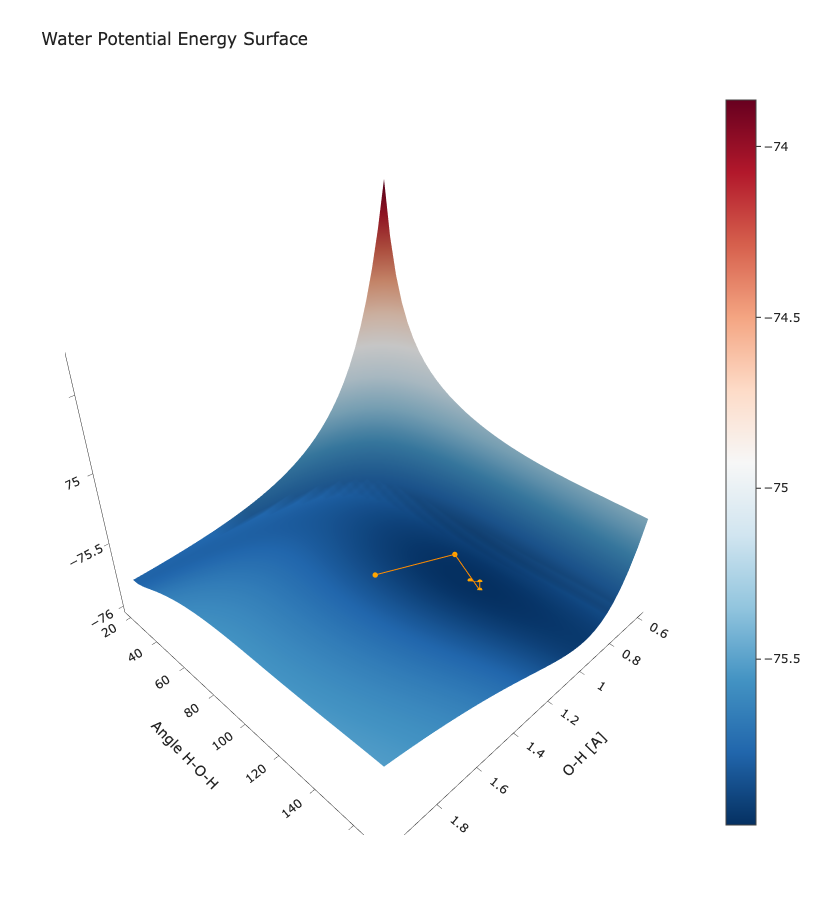

In [35]:
# this sets up the plotting widget
fig = go.Figure(data=[go.Surface(z=PES_water, 
                                 x=PES_r,
                                 y=PES_angle,
                                 colorscale='RdBu',
                                 reversescale=True,
                                 hoverinfo='none',
                                 name='Full PES',
                                 contours=go.surface.Contours(
                                    x=go.surface.contours.X(highlight=False),
                                    y=go.surface.contours.Y(highlight=False),
                                    z=go.surface.contours.Z(highlight=False),
                                )
                                )  
                     ])
# here we plot our geometry optimization results
# change the z, x, y options if you plot multiple lines, you can also change the colors
fig.add_scatter3d(z=geo_opt_energies, x=h2o_angles_dist[:,1], y=h2o_angles_dist[:,0],mode='markers+lines', marker=dict(size=3, color='orange', opacity=1),
                   line=dict(color='darkorange',width=2),
                   name="Geometry Optimization"
                 )

# this is comesmetics to add labeles etc.
fig.update_layout(title='Water Potential Energy Surface', autosize=False,
                  template='simple_white',
                  width=900, height=900,
                  scene = dict(
                      xaxis_title="O-H [A]",
                      yaxis_title="Angle H-O-H",
                      zaxis_title='Energy [a.u]',
                      xaxis_showspikes=False,
                      yaxis_showspikes=False),
                   margin=dict(l=65, r=50, b=65, t=90))
# to display the figure
fig.show()

We can also look at the molecules using the command below:

In [36]:
drawXYZGeomSlider(optimized_geos)

interactive(children=(IntSlider(value=0, description='conf', max=5), Output()), _dom_classes=('widget-interact…

```{admonition} Exercise 8
:class: excercise 
Try to start from two (or more!) different suboptimal geometries of water and include the plots of the potential energy surface in the report, together with a screenshot of the starting and final geometry and/or the values of the O-H bond and H-O-H angle. 

What do the points on the orange curve correspond to? Connect them to the flowchart at the beginning of this exercise?
```